In [174]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd

In [7]:
# Load/split your data
mu = 0
sigma = 1
y = np.random.normal(mu, sigma, 1000)

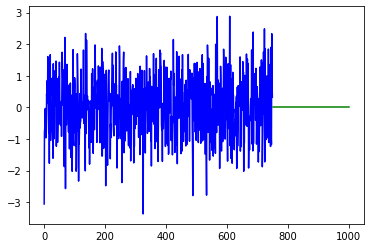

In [15]:

train, test = train_test_split(y)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:len(train)], train, c='blue')
plt.plot(x[len(train):], forecasts, c='green')
plt.show()

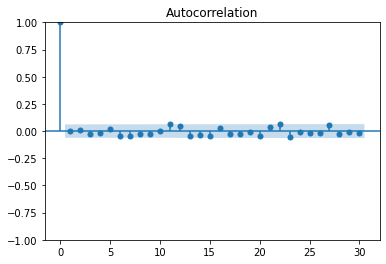

In [19]:
plot_acf(y)
plt.show()

In [171]:
w = np.random.normal(mu, sigma, 200)
ar = np.random.normal(mu, sigma, 200) - 1
ar /= 2
t  = []
t.append(w[0]*ar[0])

LAG = 10

for i in range(1,200):
    if i % LAG==0:
        t.append(t[i-LAG]+w[i]*ar[i])
    else:
        t.append(w[i]*ar[i])

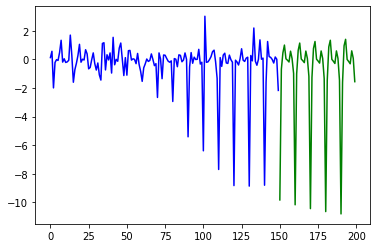

In [172]:
train, test = train_test_split(t)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=LAG)

# make your forecasts
forecasts = model.predict(len(test))  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(len(t))
plt.plot(x[:len(train)], train, c='blue')
plt.plot(x[len(train):], forecasts, c='green')
plt.show()

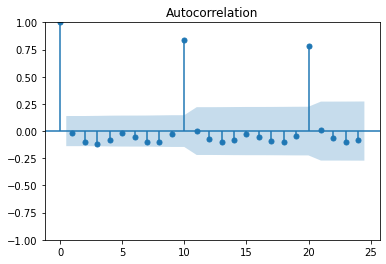

In [173]:
plot_acf(np.array(t))
plt.show()

In [146]:
def sim_arima(w, ar, n):
    z = []
    z.append(w[0]*ar[0])
    for i in range(0,n-1):
        z.append(ar[i]*z[i-1] + w[i-1])
    return np.array(z)

In [154]:
w = np.array([1]*400)#np.random.normal(0, 1, 400)
ar = np.random.normal(0, 1, 400)

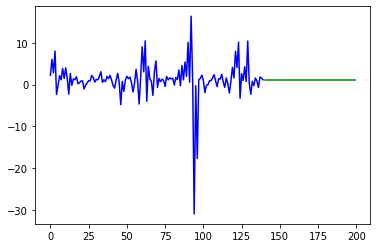

In [156]:
z = sim_arima(w, ar, 200)
train, test = train_test_split(z, train_size=int(len(z)*0.7))

# Fit your model
model = pm.auto_arima(train, seasonal=True)

# make your forecasts
forecasts = model.predict(len(test))  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(len(t))
plt.plot(x[:len(train)], train, c='blue')
plt.plot(x[len(train):], forecasts, c='green')
plt.show()

In [191]:
data = pd.read_excel('EnergieUebersichtCH-2021.xlsx', sheet_name='Zeitreihen0h15')
data

,Zeit,Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock,Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock,Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock,Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid,Vertikale Einspeisung ins Übertragungsnetz Schweiz\nGrid feed-in Swiss transmission grid,Positive Sekundär-Regelenergie\nPositive secundary control energy,Negative Sekundär-Regelenergie\nNegative secundary control energy,Positive Tertiär-Regelenergie\nPositive tertiary control energy,Negative Tertiär-Regelenergie\nNegative tertiary control energy,...,"Produktion Kantone OW, NW, UR\nProduction Cantons OW, NW, UR","Verbrauch Kantone OW, NW, UR\nConsumption Cantons OW, NW, UR","Produktion Kantone GE, VD\nProduction Cantons GE, VD","Verbrauch Kantone GE, VD\nConsumption Cantons GE, VD","Produktion Kantone SH, ZH\nProduction Cantons SH, ZH","Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH",Produktion Kantonsübergreifend\nProduction across Cantons,Verbrauch Kantonsübergreifend\nConsumption across Cantons,Produktion Regelzone CH - Ausländische Gebiete\nProduction control area CH - foreign territories,Verbrauch Regelzone CH - Ausländische Gebiete\nConsumption control area CH - foreign territories
0,01.01.2021 00:15,1.671630e+06,1210856.088,1.880738e+06,635189.489912,867033.8751,17242,-2392,0.0,0.0,...,9768.566,32685.315,27109.446,260040.413,20405.967,278109.595,97665.574,39143.313088,866.686,13374.112
1,01.01.2021 00:30,1.661251e+06,1192987.411,1.877779e+06,647088.604690,863927.1974,2639,-431,0.0,0.0,...,9764.704,32658.413,24469.448,260521.051,20517.589,277796.491,97445.697,42522.340310,822.455,13178.706
2,01.01.2021 00:45,1.641592e+06,1194179.748,1.854980e+06,625842.285412,864593.4948,230,-574,0.0,0.0,...,9181.536,32633.269,23613.422,257754.890,20614.251,273597.390,97301.079,39361.129588,615.664,12764.405
3,01.01.2021 01:00,1.627957e+06,1188029.012,1.847119e+06,621354.563153,857114.1599,126,-2521,0.0,0.0,...,6632.470,31527.531,23336.463,255148.580,20454.126,269694.877,97292.006,41680.276847,618.147,12354.812
4,01.01.2021 01:15,1.654790e+06,1233025.852,1.901856e+06,631406.874869,888966.8143,31172,-5,0.0,0.0,...,5993.125,32705.948,23221.131,260324.195,20595.143,265106.105,96116.856,40607.110131,560.224,12427.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26199,30.09.2021 23:00,1.453521e+06,1130564.903,1.555110e+06,394704.275582,679971.8105,0,-22385,12250.0,0.0,...,23532.293,25181.754,86558.761,186115.687,19599.222,241557.149,92395.273,43167.274418,705.577,19780.023
26200,30.09.2021 23:15,1.443277e+06,1043364.299,1.554464e+06,479788.846809,616418.8217,910,-1474,0.0,0.0,...,24127.375,24258.937,42520.829,181452.823,19894.109,235115.921,93767.594,39525.014191,681.628,19763.885
26201,30.09.2021 23:30,1.401042e+06,1013585.841,1.512322e+06,472428.596045,596778.1360,218,-13699,0.0,0.0,...,23099.981,23153.662,37660.420,175957.189,19944.609,228635.335,95040.686,38068.603955,697.722,19209.543
26202,30.09.2021 23:45,1.382248e+06,1021993.146,1.500872e+06,449872.823179,607991.8468,671,-2909,0.0,0.0,...,23588.517,22505.919,36533.924,171434.677,20139.302,222078.199,92505.706,37911.597821,691.065,18644.287


In [192]:
energie_usage = data['Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock']

In [193]:
energie_production = data['Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock']

In [194]:
energie_production

0        1210856.088
1        1192987.411
2        1194179.748
3        1188029.012
4        1233025.852
            ...     
26199    1130564.903
26200    1043364.299
26201    1013585.841
26202    1021993.146
26203     969411.934
Name: Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock, Length: 26204, dtype: float64